# Test: Sequence to Image Converter
**Gian Carlo L. Baldonado**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib as mpl
import time

In [2]:
giessen_orig = pd.read_csv("./Giessen_Dataset/cip_ctx_ctz_gen_multi_data.csv")

In [3]:
giessen_orig.head()

,prename,X393,X588,X747,X759,X774,X966,X1299,X1302,X1407,...,X4639956.3,X4640785.3,X4640908.3,X4640924.3,X4641031.3,X4641131.3,X4641217.3,X4641296.3,X4641439.3,X4641440.3
0,H100_S2_L001,2,1,2,4,3,3,3,3,4,...,3,4,4,2,1,3,1,3,3,1
1,H105_S3_L001,2,1,2,4,3,3,3,3,4,...,3,4,4,2,1,3,1,3,3,1
2,H108_S5_L001,2,1,2,4,3,3,0,0,4,...,3,4,4,2,1,3,1,3,3,1
3,H109_S2_L001,2,1,2,4,3,3,3,3,4,...,3,4,4,2,1,3,1,3,3,1
4,H113_S6_L001,0,0,2,4,3,3,3,3,4,...,3,4,0,0,2,3,1,3,3,1


In [11]:
giessen_orig.shape

(809, 60937)

In [4]:
df = giessen_orig.copy()

In [5]:
gene_df = df.drop(columns=["prename"])
gene_df

,X393,X588,X747,X759,X774,X966,X1299,X1302,X1407,X1425,...,X4639956.3,X4640785.3,X4640908.3,X4640924.3,X4641031.3,X4641131.3,X4641217.3,X4641296.3,X4641439.3,X4641440.3
0,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1
1,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1
2,2,1,2,4,3,3,0,0,4,2,...,3,4,4,2,1,3,1,3,3,1
3,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1
4,0,0,2,4,3,3,3,3,4,2,...,3,4,0,0,2,3,1,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,0,0,2,4,3,3,0,0,4,0,...,3,4,0,0,2,3,1,3,3,1
805,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1
806,2,0,0,0,3,0,3,3,4,0,...,3,4,0,0,0,3,0,0,0,0
807,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1


**Task: Find the dimension of image before converting the genotype sequence in the form of an image**
https://www.frontiersin.org/files/Articles/914435/fbinf-02-914435-HTML/image_m/fbinf-02-914435-g005.jpg

1. Let N be the length of the genotype sequence.
2. Take the sqrt of N and suppose it is M. Extract 0 to the square of M sequence from the genotype data.

In [6]:
no_isolates = gene_df.shape[0]
N = gene_df.shape[1]
print("Length of genotype sequence:",N)

Length of genotype sequence: 60936


In [7]:
gene_df

,X393,X588,X747,X759,X774,X966,X1299,X1302,X1407,X1425,...,X4639956.3,X4640785.3,X4640908.3,X4640924.3,X4641031.3,X4641131.3,X4641217.3,X4641296.3,X4641439.3,X4641440.3
0,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1
1,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1
2,2,1,2,4,3,3,0,0,4,2,...,3,4,4,2,1,3,1,3,3,1
3,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1
4,0,0,2,4,3,3,3,3,4,2,...,3,4,0,0,2,3,1,3,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,0,0,2,4,3,3,0,0,4,0,...,3,4,0,0,2,3,1,3,3,1
805,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1
806,2,0,0,0,3,0,3,3,4,0,...,3,4,0,0,0,3,0,0,0,0
807,2,1,2,4,3,3,3,3,4,2,...,3,4,4,2,1,3,1,3,3,1


## Encoding with Padding

Similarto padding used in CNNs, padding in this case helps us retain information when transforming from sequence to 2d matrix. 

N = 60,936
M = 246

Next biggest perfect square is 247, which 247^2 = 61,009
61,009 - 60,936 = 73 filler nucleotides with -1 value

In [8]:
def encode_seq_to_image(seq):
    N = len(seq)
    M = int(np.sqrt(N))
    image_dimension = M + 1 if M**2 < N else M # if M**2 is smaller than N, then take the next biggest M

    # Padding the sequence with zeros
    padding_required = image_dimension**2 - N
    padded_seq = np.pad(seq, (0, padding_required), 'constant', constant_values=-1)

    # Reshaping the padded sequence into a matrix
    image_data = np.reshape(padded_seq, (image_dimension, image_dimension))
    # Previous image_data which truncates the sequence
    # image_data = np.array(seq[:M*M]).reshape(M,M)
    
    return image_data

In [9]:
a = gene_df.iloc[0].to_list()
a

[2,
 1,
 2,
 4,
 3,
 3,
 3,
 3,
 4,
 2,
 2,
 2,
 2,
 2,
 4,
 3,
 2,
 4,
 4,
 2,
 3,
 2,
 4,
 1,
 2,
 3,
 3,
 3,
 3,
 3,
 2,
 3,
 4,
 4,
 1,
 3,
 1,
 2,
 3,
 3,
 3,
 4,
 3,
 2,
 2,
 2,
 1,
 2,
 1,
 2,
 2,
 1,
 1,
 4,
 2,
 2,
 3,
 2,
 2,
 3,
 3,
 4,
 4,
 2,
 2,
 1,
 3,
 4,
 4,
 3,
 2,
 2,
 2,
 1,
 2,
 1,
 3,
 2,
 4,
 2,
 2,
 3,
 1,
 2,
 2,
 3,
 2,
 4,
 2,
 1,
 1,
 2,
 1,
 2,
 2,
 4,
 4,
 4,
 3,
 3,
 4,
 3,
 4,
 2,
 3,
 3,
 2,
 2,
 4,
 2,
 4,
 1,
 1,
 3,
 2,
 3,
 1,
 3,
 4,
 3,
 2,
 3,
 3,
 4,
 1,
 3,
 2,
 4,
 3,
 3,
 3,
 3,
 3,
 2,
 4,
 4,
 2,
 2,
 4,
 3,
 1,
 1,
 1,
 3,
 4,
 2,
 3,
 2,
 1,
 1,
 1,
 3,
 2,
 3,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 2,
 4,
 4,
 2,
 3,
 2,
 4,
 2,
 1,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 2,
 3,
 3,
 4,
 3,
 2,
 3,
 3,
 4,
 4,
 2,
 4,
 2,
 3,
 3,
 2,
 2,
 3,
 2,
 3,
 4,
 2,
 3,
 3,
 2,
 4,
 2,
 2,
 3,
 1,
 2,
 2,
 3,
 4,
 4,
 3,
 1,
 4,
 3,
 1,
 2,
 2,
 3,
 2,
 3,
 4,
 1,
 2,
 1,
 4,
 3,
 4,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 3,
 3,
 3,
 1,
 4,
 1,
 3,
 2,
 0,
 4,
 2,
 3,


In [10]:
b = encode_seq_to_image(a)
b

array([[ 2,  1,  2, ...,  3,  2,  0],
       [ 4,  2,  3, ...,  3,  3,  3],
       [ 3,  3,  4, ...,  1,  2,  2],
       ...,
       [ 3,  2,  3, ...,  3,  3,  3],
       [ 2,  4,  3, ...,  3,  3,  3],
       [ 3,  2,  3, ..., -1, -1, -1]])

In [11]:
len(b)

247

In [12]:
## Heatmap
def heatmap2d(name, arr):
    fig = plt.figure()
    plt.imshow(arr, cmap=cmap)
    plt.axis('off')
    plt.savefig(f'./output_images/{name}.png')
    plt.close(fig) #Avoids displaying figure in notebook

In [13]:
heatmap2d('b',b)

NameError: name 'cmap' is not defined

<Figure size 432x288 with 0 Axes>

## Color mapping
* -1 = Padding = gray
* 0 = Null = white,
* 1 = A = red
* 2 = C = green
* 3 = G = yellow
* 4 = T = blue

In [14]:
def process_encoding(file_path):

    ###
    # Processes a csv file containing genotype sequences, 
    # encodes the genotype sequences into 2d matrices,  
    # creates visualizations for each 2d matrices as .pngs,
    # and returns a dict where keys are name of isolates and values are 2d matrix representation of the genotype sequences. 

    # Input: file_path: str, path to the csv file
    # Output: image_data_dict, dict containing isolate name (key) and its 2d-encoded gene sequences (values)

    print("Start encoding process of genotype sequences to images.")
    
    start_time = time.time()
    print("1. Reading and processing CSV.")

    df = pd.read_csv(file_path)
    gene_df = df.drop(columns=["prename"])

    isolate_list = df["prename"]
    gene_lists = gene_df.values.tolist()
    genotype_seq_dict = dict(zip(isolate_list, gene_lists))

    no_of_isolates = len(isolate_list)
    len_of_genes = gene_df.shape[1]
    M = int(np.sqrt(len_of_genes))
    print("Number of isolates:", no_of_isolates)
    print("Length of genotype sequence:", len_of_genes)
    print(f"Image dimensions: {M} x {M}")

    print("2. Encoding...")
    # Encode

    image_data_dict = dict()
    for k,v in genotype_seq_dict.items(): # k = name, v = gene sequence
        image_data = encode_seq_to_image(v)
        image = heatmap2d(k, image_data)
        image_data_dict[k] = image_data

    end_time = time.time()
    duration = np.round(end_time-start_time, 2)
    print("Finished encoding process. Duration:", duration, " seconds.")

    return image_data_dict
    

In [19]:
image_dict = process_encoding("./Giessen_Dataset/cip_ctx_ctz_gen_multi_data.csv")

Start encoding process of genotype sequences to images.
1. Reading and processing CSV.
Number of isolates: 809
Length of genotype sequence: 60936
Image dimensions: 246 x 246
2. Encoding...
Finished encoding process. Duration: 138.29  seconds.


In [26]:
all_isolates_matrix = list(image_dict.values())

In [42]:
type(all_isolates_matrix[0][0])

numpy.ndarray

In [30]:
copy_all_isolate_matrix = all_isolates_matrix.copy()

In [36]:
sample_3d = [[[3,4,1]]]

In [ ]:
copy_all_isolate_matrix

In [76]:
new_matrix = []
for i in copy_all_isolate_matrix:
    new_matrix.append(i.tolist())


In [81]:
for isolate in new_matrix:
    for nucleotide_pos in isolate:
        for nuc in range(len(nucleotide_pos)):
            # print(nucleotide_pos[nuc])
            if nucleotide_pos[nuc] == 0:
                nucleotide_pos[nuc] = white
            if nucleotide_pos[nuc] == 1:
                nucleotide_pos[nuc] = red
            if nucleotide_pos[nuc] == 2:
                nucleotide_pos[nuc] = green
            if nucleotide_pos[nuc] == 3:
                nucleotide_pos[nuc] == yellow
            if nucleotide_pos[nuc] == 4:
                nucleotide_pos[nuc] = blue
            if nucleotide_pos[nuc] == -1:
                nucleotide_pos[nuc] = grey

In [82]:
new_matrix

In [58]:
green

[0.0, 255.0, 0.0]

In [37]:
copy_all_isolate_matrix

[array([[ 2,  1,  2, ...,  3,  2,  0],
        [ 4,  2,  3, ...,  3,  3,  3],
        [ 3,  3,  4, ...,  1,  2,  2],
        ...,
        [ 3,  2,  3, ...,  3,  3,  3],
        [ 2,  4,  3, ...,  3,  3,  3],
        [ 3,  2,  3, ..., -1, -1, -1]]),
 array([[ 2,  1,  2, ...,  3,  2,  4],
        [ 4,  2,  3, ...,  3,  3,  3],
        [ 3,  3,  4, ...,  1,  2,  2],
        ...,
        [ 3,  2,  3, ...,  3,  3,  3],
        [ 2,  4,  3, ...,  3,  3,  3],
        [ 3,  2,  3, ..., -1, -1, -1]]),
 array([[ 2,  1,  2, ...,  3,  2,  4],
        [ 4,  2,  3, ...,  3,  3,  0],
        [ 3,  3,  4, ...,  1,  0,  0],
        ...,
        [ 3,  2,  3, ...,  3,  3,  3],
        [ 2,  4,  3, ...,  3,  3,  3],
        [ 3,  0,  3, ..., -1, -1, -1]]),
 array([[ 2,  1,  2, ...,  3,  2,  4],
        [ 0,  0,  0, ...,  0,  0,  0],
        [ 3,  0,  0, ...,  1,  2,  1],
        ...,
        [ 3,  2,  3, ...,  3,  3,  3],
        [ 2,  4,  3, ...,  3,  0,  3],
        [ 3,  2,  3, ..., -1, -1, -1]]),
 arr

## Color mapping
* -1 = Padding = gray
* 0 = Null = white,
* 1 = A = red
* 2 = C = green
* 3 = G = yellow
* 4 = T = blue

In [29]:
all_isolates_matrix[0][0][0]

2

In [54]:
white = [255.0,255.0,255.0]
red = [255.0,0.0,0.0]
yellow = [255.0, 255.0, 0.0]
green = [0.0, 255.0, 0.0]
blue = [0.0, 0.0, 255.0]
grey = [211.0, 211.0, 211.0]

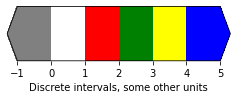

In [15]:
fig, ax = plt.subplots(figsize=(4, 1))

cmap = ListedColormap(['gray','white', 'red', 'green', 'yellow', 'blue'])
bounds = [-1,0,1,2,3,4,5]
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig.colorbar(
    mpl.cm.ScalarMappable(cmap=cmap, norm=norm),
    cax=ax,
    extend='both',
    ticks=bounds,
    spacing='proportional',
    orientation='horizontal',
    label='Discrete intervals, some other units',
)

In [16]:
def merge_X_y(X_df, y_df):
    """
    X_df, file path to the feature file
    y_df, file path to the label file
    """
    X = pd.read_csv(X_df)
    y = pd.read_csv(y_df)

    # merge logic
    Xy = X.merge(y)
    return Xy

In [5]:
merge_X_y(X_df="./Giessen_Dataset/cip_ctx_ctz_gen_multi_data.csv", y_df="./Giessen_Dataset/cip_ctx_ctz_gen_pheno.csv")

,prename,X393,X588,X747,X759,X774,X966,X1299,X1302,X1407,...,X4641031.3,X4641131.3,X4641217.3,X4641296.3,X4641439.3,X4641440.3,CIP,CTX,CTZ,GEN
0,H100_S2_L001,2,1,2,4,3,3,3,3,4,...,1,3,1,3,3,1,0,1,0,0
1,H105_S3_L001,2,1,2,4,3,3,3,3,4,...,1,3,1,3,3,1,1,1,0,0
2,H108_S5_L001,2,1,2,4,3,3,0,0,4,...,1,3,1,3,3,1,0,1,0,0
3,H109_S2_L001,2,1,2,4,3,3,3,3,4,...,1,3,1,3,3,1,0,1,0,0
4,H113_S6_L001,0,0,2,4,3,3,3,3,4,...,2,3,1,3,3,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,wwRBK-17-0298-1_S42,0,0,2,4,3,3,0,0,4,...,2,3,1,3,3,1,1,1,1,0
805,wwRBK-17-075-1_S28,2,1,2,4,3,3,3,3,4,...,1,3,1,3,3,1,1,1,1,1
806,wwRBL-16-111-1_S16,2,0,0,0,3,0,3,3,4,...,0,3,0,0,0,0,1,1,1,0
807,wwRBL-17-004-1_S44,2,1,2,4,3,3,3,3,4,...,1,3,1,3,3,1,1,1,1,1
